In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Ensure inline plotting if using Jupyter Notebook
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score

In [2]:
import pandas as pd

# 1978 to 2022
file_path = r"C:\Users\rahla\Desktop\Sikkim-Rainfall-Prediction\1901 to 2022 Datasets\cleaned_merged_data.xlsx"

# Read the Excel file
data = pd.read_excel(file_path)

# Display the first few rows of the data
print(data.head())

        Date    Day  Year  Month Location  Rainfall (in mm)  Latitude  \
0 1901-01-01  Day_1  1901      1    Loc_0               3.0     27.25   
1 1901-01-02  Day_2  1901      1    Loc_0               8.0     27.25   
2 1901-01-03  Day_3  1901      1    Loc_0               0.0     27.25   
3 1901-01-04  Day_4  1901      1    Loc_0               0.0     27.25   
4 1901-01-05  Day_5  1901      1    Loc_0               0.0     27.25   

   Longitude  Quarter  
0      88.25        1  
1      88.25        1  
2      88.25        1  
3      88.25        1  
4      88.25        1  


In [3]:
data.shape

(669559, 9)

In [4]:
print(data.columns)

Index(['Date', 'Day', 'Year', 'Month', 'Location', 'Rainfall (in mm)',
       'Latitude', 'Longitude', 'Quarter'],
      dtype='object')


In [6]:
data['class'] = data['Rainfall (in mm)'].apply(lambda x : 1 if x > 0 else 0)
data.head()

# divided in classes - 1 for rainfall, 0 for no rainfall

,Date,Day,Year,Month,Location,Rainfall (in mm),Latitude,Longitude,Quarter,Day_of_Week,Day_of_Year,class
0,1901-01-01,Day_1,1901,1,0,3.0,27.25,88.25,1,1,1,1
1,1901-01-02,Day_2,1901,1,0,8.0,27.25,88.25,1,2,2,1
2,1901-01-03,Day_3,1901,1,0,0.0,27.25,88.25,1,3,3,0
3,1901-01-04,Day_4,1901,1,0,0.0,27.25,88.25,1,4,4,0
4,1901-01-05,Day_5,1901,1,0,0.0,27.25,88.25,1,5,5,0


In [6]:
data['class'].value_counts()

class
1    360925
0    308634
Name: count, dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669559 entries, 0 to 669558
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              669559 non-null  datetime64[ns]
 1   Day               669559 non-null  object        
 2   Year              669559 non-null  int64         
 3   Month             669559 non-null  int64         
 4   Location          669559 non-null  object        
 5   Rainfall (in mm)  669559 non-null  float64       
 6   Latitude          669559 non-null  float64       
 7   Longitude         669559 non-null  float64       
 8   Quarter           669559 non-null  int64         
 9   class             669559 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(2)
memory usage: 51.1+ MB


In [3]:
data['Day_of_Week'] = data['Date'].dt.dayofweek  # Day of the week (0=Monday, 6=Sunday)
data['Day_of_Year'] = data['Date'].dt.dayofyear  # Day of the year (1-365/366) 

In [7]:
print(data.columns)

Index(['Date', 'Day', 'Year', 'Month', 'Location', 'Rainfall (in mm)',
       'Latitude', 'Longitude', 'Quarter', 'Day_of_Week', 'Day_of_Year',
       'class'],
      dtype='object')


In [8]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Location'] = label_encoder.fit_transform(data['Location'])

In [9]:
X = data.drop(['class','Quarter','Date','Day','Rainfall (in mm)'] , axis = 1)
y = data['class']
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state = 1)

In [10]:
print(X.columns)

Index(['Year', 'Month', 'Location', 'Latitude', 'Longitude', 'Day_of_Week',
       'Day_of_Year'],
      dtype='object')


In [16]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train , y_train)

C:\Users\rahla\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
y_pred = model.predict(X_test)

In [18]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5368351355118784
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.17      0.25     92857
           1       0.54      0.85      0.66    108011

    accuracy                           0.54    200868
   macro avg       0.52      0.51      0.46    200868
weighted avg       0.52      0.54      0.47    200868



In [12]:
from sklearn.linear_model import SGDClassifier
# changed from SVC() then LinearSVC()
model = SGDClassifier(loss="hinge")  # Hinge loss is used for SVM
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

C:\Users\rahla\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Accuracy: 0.4567875420674274
Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.97      0.62     92857
           1       0.39      0.02      0.04    108011

    accuracy                           0.46    200868
   macro avg       0.43      0.49      0.33    200868
weighted avg       0.42      0.46      0.31    200868



In [13]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8996256247884182
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.90      0.89     92857
           1       0.91      0.90      0.91    108011

    accuracy                           0.90    200868
   macro avg       0.90      0.90      0.90    200868
weighted avg       0.90      0.90      0.90    200868



In [14]:
new = data[data['Location'] == 0]
new.head()

,Date,Day,Year,Month,Location,Rainfall (in mm),Latitude,Longitude,Quarter,Day_of_Week,Day_of_Year,class
0,1901-01-01,Day_1,1901,1,0,3.0,27.25,88.25,1,1,1,1
1,1901-01-02,Day_2,1901,1,0,8.0,27.25,88.25,1,2,2,1
2,1901-01-03,Day_3,1901,1,0,0.0,27.25,88.25,1,3,3,0
3,1901-01-04,Day_4,1901,1,0,0.0,27.25,88.25,1,4,4,0
4,1901-01-05,Day_5,1901,1,0,0.0,27.25,88.25,1,5,5,0


In [15]:
new.shape

(60869, 12)

<Axes: xlabel='Month', ylabel='Rainfall (in mm)'>

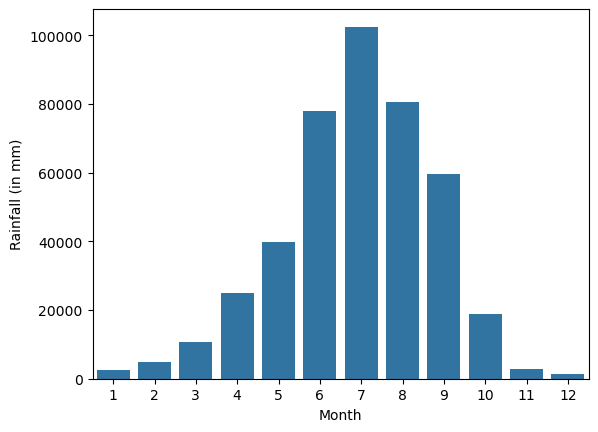

In [16]:
# checking which month has the highest rainfall for location 0
monthly_rainfall = new.groupby('Month')['Rainfall (in mm)'].sum().reset_index()

# Plotting the total rainfall for each month
sns.barplot(x='Month', y='Rainfall (in mm)', data=monthly_rainfall)

**We can see that location 0 experience most rainfall in 8th month i.e august**

In [17]:
monthly_rainfall

,Month,Rainfall (in mm)
0,1,2633.0
1,2,4801.2
2,3,10777.2
3,4,24944.4
4,5,39877.6
5,6,77853.0
6,7,102469.6
7,8,80471.0
8,9,59596.8
9,10,18829.0


In [18]:
most_rainfall = new.groupby('Month')['Rainfall (in mm)'].sum().max()
most_rainfall

102469.6

In [19]:
monthly_location_rainfall = data.groupby(['Month','Location'])['Rainfall (in mm)'].sum().reset_index()
monthly_location_rainfall

,Month,Location,Rainfall (in mm)
0,1,0,2633.0
1,1,1,2609.0
2,1,2,3829.4
3,1,3,2141.2
4,1,4,4365.4
...,...,...,...
127,12,6,1853.0
128,12,7,2045.2
129,12,8,1968.0
130,12,9,1995.0


In [ ]:
# g = sns.FacetGrid(data = monthly_location_rainfall , col="Location", col_wrap=4, height=4)
# g.map(sns.barplot , 'Month' , 'Rainfall (in mm)',order=range(1, 13))

sns.catplot(
    data=monthly_location_rainfall,
    kind="bar",
    x="Month",
    y="Rainfall (in mm)",
    col="Location",
    col_wrap=4,
    order=range(1, 13),
    height=4
)


**We can see that all 11 locations experience highest rainfalls in the months of june, july, august**